In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [5]:
model = SVC(C=10,kernel='rbf',gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9777777777777777

In [6]:
cross_val_score(SVC(C=10,kernel='rbf',gamma='scale'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [7]:
cross_val_score(SVC(C=20,kernel='rbf',gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [8]:
cross_val_score(SVC(C=10,kernel='linear',gamma='scale'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [9]:
import numpy as np
cvals = [1,10,20]
kvals = ['rbf','linear']
avg_scores = {}
for k in kvals:
    for c in cvals:
        val = cross_val_score(SVC(C=c,kernel=k,gamma='scale'),iris.data,iris.target,cv=5)
        avg_scores[k+'_'+str(c)] = np.average(val)
        
avg_scores

{'rbf_1': 0.9666666666666666,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9800000000000001,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [10]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='scale'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
}, cv=5, return_train_score=False)

clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00144591, 0.00114164, 0.00160537, 0.00144439, 0.00159645,
        0.00117378]),
 'std_fit_time': array([0.00047068, 0.00038057, 0.00049627, 0.00055656, 0.00048764,
        0.00042027]),
 'mean_score_time': array([0.00078864, 0.00074711, 0.00078859, 0.00074768, 0.00059738,
        0.000598  ]),
 'std_score_time': array([0.00039462, 0.00038802, 0.0003948 , 0.00038635, 0.00048776,
        0.00048827]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [11]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001446,0.000471,0.000789,0.000395,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.0,0.966667,0.021082,5
1,0.001142,0.000381,0.000747,0.000388,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001605,0.000496,0.000789,0.000395,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001444,0.000557,0.000748,0.000386,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001596,0.000488,0.000597,0.000488,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.001174,0.000420,0.000598,0.000488,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,5


In [12]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.966667
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.980000
5,20,linear,0.966667


In [13]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [14]:
clf.best_score_

0.9800000000000001

In [15]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [16]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='scale'),{
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False,n_iter=2)
rs.fit(iris.data,iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.980000
1,10,linear,0.973333


In [17]:
# which model is the best?
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
model_params={
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [19]:
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
scores

[{'model': 'svm',
  'best_score': 0.9800000000000001,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9666666666666668,
  'best_params': {'n_estimators': 5}},
 {'model': 'logistic_regression',
  'best_score': 0.9666666666666668,
  'best_params': {'C': 5}}]

In [20]:
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


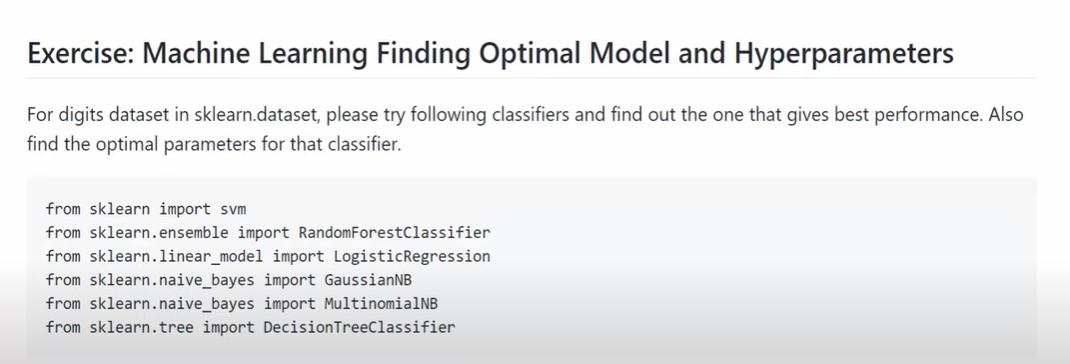

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [22]:
model_params={
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'gaussian_naive_bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [0.5e-9,1e-9,1.5e-9]
        }
    },
    'multinomial_naive_bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.2,0.5,1]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    }
}

In [23]:
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}
3,gaussian_naive_bayes,0.953333,{'var_smoothing': 5e-10}
4,multinomial_naive_bayes,0.953333,{'alpha': 0.2}
5,decision_tree,0.960000,{'criterion': 'gini'}
